In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta,date
import matplotlib.pyplot as plt
import folium
import plotly.express as px
from matplotlib import ticker 
from scipy.interpolate import make_interp_spline, BSpline
import pycountry_convert as pc

## Interactive web-based dashboard https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

## COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
### https://github.com/CSSEGISandData/COVID-19/

In [2]:
# Retriving Dataset from 
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
# which is updated daily
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_confirmed_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_deaths_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [3]:
# Retriving Dataset from 
# https://github.com/CSSEGISandData/COVID-19/tree/web-data/data
# which is updated hourly
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])
df_state = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_state.csv")
df_case = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases.csv")

/Users/yingli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.



In [289]:
#df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})

In [290]:
df_covid19.head(1)

Country_Region          Last_Update       Lat      Long_  Confirmed  Deaths  \
0    Afghanistan  2020-09-30 19:23:37  33.93911  67.709953    39268.0  1458.0   

   Recovered  Active  Incident_Rate  People_Tested  People_Hospitalized  \
0    32789.0  5021.0     100.872524            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        3.712947    4  AFG

In [291]:
df_table.head(5)

Country_Region Last_Update  Confirmed  Deaths  Recovered  Active  \
0    Afghanistan  2020-01-22          0       0        NaN     NaN   
1    Afghanistan  2020-01-23          0       0        NaN     NaN   
2    Afghanistan  2020-01-24          0       0        NaN     NaN   
3    Afghanistan  2020-01-25          0       0        NaN     NaN   
4    Afghanistan  2020-01-26          0       0        NaN     NaN   

   Delta_Confirmed  Delta_Recovered  Incident_Rate  People_Tested  \
0              0.0              NaN            0.0            NaN   
1              0.0              NaN            0.0            NaN   
2              0.0              NaN            0.0            NaN   
3              0.0              NaN            0.0            NaN   
4              0.0              NaN            0.0            NaN   

   People_Hospitalized Province_State  FIPS  UID iso3 Report_Date_String  \
0                  NaN            NaN   NaN    4  AFG         2020/01/22   
1                  NaN            NaN   NaN    4  AFG         2020/01/23   
2                  NaN            NaN   NaN    4  AFG         2020/01/24   
3                  NaN            NaN   NaN    4  AFG         2020/01/25   
4                  NaN            NaN   NaN    4  AFG         2020/01/26   

   Delta_Deaths  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [292]:
df_state.head(5)

Province_State Country_Region          Last_Update      Lat  \
0  Australian Capital Territory      Australia  2020-09-30 18:30:35 -35.4735   
1               New South Wales      Australia  2020-09-30 18:30:35 -33.8688   
2            Northern Territory      Australia  2020-09-30 18:30:35 -12.4634   
3                    Queensland      Australia  2020-09-30 18:30:35 -27.4698   
4               South Australia      Australia  2020-09-30 18:30:35 -34.9285   

      Long_  Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  \
0  149.0124        113       3      110.0     0.0   NaN      26.395702   
1  151.2093       4224      53     3129.0  1042.0   NaN      52.032520   
2  130.8456         33       0       31.0     2.0   NaN      13.436482   
3  153.0251       1157       6     1142.0     9.0   NaN      22.617535   
4  138.6007        468       4      464.0     0.0   NaN      26.643894   

   People_Tested  People_Hospitalized  Mortality_Rate   UID ISO3  \
0            NaN                  NaN        2.654867  3601  AUS   
1            NaN                  NaN        1.254735  3602  AUS   
2            NaN                  NaN        0.000000  3603  AUS   
3            NaN                  NaN        0.518583  3604  AUS   
4            NaN                  NaN        0.854701  3605  AUS   

   Testing_Rate  Hospitalization_Rate  
0           NaN                   NaN  
1           NaN                   NaN  
2           NaN                   NaN  
3           NaN                   NaN  
4           NaN                   NaN

In [293]:
df_case.head(5)

Province_State Country_Region          Last_Update       Lat      Long_  \
0            NaN    Afghanistan  2020-09-30 18:23:33  33.93911  67.709953   
1            NaN        Albania  2020-09-30 18:23:33  41.15330  20.168300   
2            NaN        Algeria  2020-09-30 18:23:33  28.03390   1.659600   
3            NaN        Andorra  2020-09-30 18:23:33  42.50630   1.521800   
4            NaN         Angola  2020-09-30 18:23:33 -11.20270  17.873900   

   Confirmed  Deaths  Recovered   Active Admin2  FIPS Combined_Key  \
0      39268    1458      32789   5021.0    NaN   NaN  Afghanistan   
1      13649     387       7847   5415.0    NaN   NaN      Albania   
2      51530    1736      36174  13620.0    NaN   NaN      Algeria   
3       2050      53       1432    565.0    NaN   NaN      Andorra   
4       4905     179       1833   2893.0    NaN   NaN       Angola   

   Incident_Rate  People_Tested  People_Hospitalized  UID ISO3  
0     100.872524            NaN                  NaN    4  AFG  
1     474.285913            NaN                  NaN    8  ALB  
2     117.511458            NaN                  NaN   12  DZA  
3    2653.206497            NaN                  NaN   20  AND  
4      14.924116            NaN                  NaN   24  AGO

In [294]:
df_confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/20/20  9/21/20  9/22/20  \
0        0        0        0        0  ...    39044    39074    39096   
1        0        0        0        0  ...    12385    12535    12666   
2        0        0        0        0  ...    49826    50023    50214   
3        0        0        0        0  ...     1564     1681     1681   
4        0        0        0        0  ...     3991     4117     4236   

   9/23/20  9/24/20  9/25/20  9/26/20  9/27/20  9/28/20  9/29/20  
0    39145    39170    39186    39192    39227    39233    39254  
1    12787    12921    13045    13153    13259    13391    13518  
2    50400    50579    50754    50914    51067    51213    51368  
3     1753     1753     1836     1836     1836     1966     1966  
4     4363     4475     4590     4672     4718     4797     4905  

[5 rows x 256 columns]

### Preprocessing 

In [319]:
# rename the column name 
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_recovered = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_table = df_table.rename(columns={"Country_Region": "country"})
df_case = df_case.rename(columns={"Province/State":"state","Country/Region": "country"})

In [320]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['country'] == "Korea, South", "Country_Region"] = "South Korea"

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['country'] == "Taiwan*", "Country_Region"] = "Taiwan"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['country'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"


df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['country'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['country'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_recovered.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] ) 
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])

In [325]:
df_table = df_table[df_table["continent"] != "Others"]

In [326]:
df_table.head()

country continent Last_Update  Confirmed  Deaths  Recovered  \
9828  Congo (Brazzaville)    Africa  2020-01-22          0       0        NaN   
9829  Congo (Brazzaville)    Africa  2020-01-23          0       0        NaN   
9830  Congo (Brazzaville)    Africa  2020-01-24          0       0        NaN   
9831  Congo (Brazzaville)    Africa  2020-01-25          0       0        NaN   
9832  Congo (Brazzaville)    Africa  2020-01-26          0       0        NaN   

      Active  Delta_Confirmed  Delta_Recovered  Incident_Rate  People_Tested  \
9828     NaN              0.0              NaN            0.0            NaN   
9829     NaN              0.0              NaN            0.0            NaN   
9830     NaN              0.0              NaN            0.0            NaN   
9831     NaN              0.0              NaN            0.0            NaN   
9832     NaN              0.0              NaN            0.0            NaN   

      People_Hospitalized Province_State  FIPS  UID iso3 Report_Date_String  \
9828                  NaN            NaN   NaN  178  COG         2020/01/22   
9829                  NaN            NaN   NaN  178  COG         2020/01/23   
9830                  NaN            NaN   NaN  178  COG         2020/01/24   
9831                  NaN            NaN   NaN  178  COG         2020/01/25   
9832                  NaN            NaN   NaN  178  COG         2020/01/26   

      Delta_Deaths         Country_Region  
9828           0.0  Republic of the Congo  
9829           0.0  Republic of the Congo  
9830           0.0  Republic of the Congo  
9831           0.0  Republic of the Congo  
9832           0.0  Republic of the Congo

In [323]:
df_deaths[df_deaths["continent" ]== 'Others']

state             country continent        Lat        Long  1/22/20  \
34    NaN               Burma    Others  21.916200   95.956000        0   
102   NaN    Diamond Princess    Others   0.000000    0.000000        0   
139   NaN            Holy See    Others  41.902900   12.453400        0   
156   NaN              Kosovo    Others  42.602636   20.902977        0   
168   NaN          MS Zaandam    Others   0.000000    0.000000        0   
237   NaN         Timor-Leste    Others  -8.874217  125.727539        0   
242   NaN                  US    Others  40.000000 -100.000000        0   
261   NaN  West Bank and Gaza    Others  31.952200   35.233200        0   
262   NaN      Western Sahara    Others  24.215500  -12.885800        0   

     1/23/20  1/24/20  1/25/20  1/26/20  ...  9/20/20  9/21/20  9/22/20  \
34         0        0        0        0  ...       94      100      116   
102        0        0        0        0  ...       13       13       13   
139        0        0        0        0  ...        0        0        0   
156        0        0        0        0  ...      488      488      488   
168        0        0        0        0  ...        2        2        2   
237        0        0        0        0  ...        0        0        0   
242        0        0        0        0  ...   199509   199865   200786   
261        0        0        0        0  ...      262      265      269   
262        0        0        0        0  ...        1        1        1   

     9/23/20  9/24/20  9/25/20  9/26/20  9/27/20  9/28/20  9/29/20  
34       133      155      174      198      226      256      284  
102       13       13       13       13       13       13       13  
139        0        0        0        0        0        0        0  
156      488      488      488      488      488      488      488  
168        2        2        2        2        2        2        2  
237        0        0        0        0        0        0        0  
242   201884   202798   203750   204490   204756   205072   205986  
261      272      274      278      285      291      299      306  
262        1        1        1        1        1        1        1  

[9 rows x 257 columns]

In [327]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

 # Defining Functions
 <hr>
* plot_params()
* visualize_covid_cases()
* get_mortality_rate()

In [328]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = ""+"output/"

# General Analysis of Data

In [329]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update','People_Tested','People_Hospitalized','Mortality_Rate','Incident_Rate','ISO3','UID'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update','People_Tested','People_Hospitalized','Mortality_Rate','Incident_Rate','ISO3','UID'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

In [330]:
df_countries_cases.head()

Confirmed  Deaths  Recovered   Active
country                                           
Afghanistan    39268.0  1458.0    32789.0   5021.0
Albania        13649.0   387.0     7847.0   5415.0
Algeria        51530.0  1736.0    36174.0  13620.0
Andorra         2050.0    53.0     1432.0    565.0
Angola          4972.0   183.0     1941.0   2848.0

### Global Reported Cases till Date

In [331]:
pd.DataFrame(df_countries_cases.sum()).transpose()

Confirmed     Deaths   Recovered     Active
0  33793391.0  1010288.0  23449249.0  9332828.0

### Coninent Wise Reported Cases 
Coninent Wise reported confirmed cases, recovered cases, deaths, active cases

In [332]:
df_continents_cases

Confirmed    Deaths  Recovered     Active
continent                                                
Africa          1479416.0   35779.0  1224347.0   219290.0
Asia           10492843.0  192917.0  8806899.0  1493027.0
Australia         29480.0     920.0    27063.0     1497.0
Europe          5068157.0  222469.0  2435849.0  2408813.0
North America   1431115.0   99080.0  1122894.0   209141.0
Others          7283554.0  207740.0  2858290.0  4217524.0
South America   8008826.0  251383.0  6973907.0   783536.0

### Country Wise Reported Cases
Country Wise reported confirmed cases, recovered cases, deaths, active cases

### Top 10 countries (Confirmed Cases and Deaths)

In [506]:
df_countries_cases

Confirmed    Deaths  Recovered     Active
country                                                          
Afghanistan               39268.0    1458.0    32789.0     5021.0
Albania                   13649.0     387.0     7847.0     5415.0
Algeria                   51530.0    1736.0    36174.0    13620.0
Andorra                    2050.0      53.0     1432.0      565.0
Angola                     4972.0     183.0     1941.0     2848.0
Antigua and Barbuda         101.0       3.0       92.0        6.0
Argentina                736609.0   16519.0   585857.0   134233.0
Armenia                   50359.0     959.0    44001.0     5399.0
Australia                 27078.0     886.0    24752.0     1440.0
Austria                   44813.0     799.0    35644.0     8370.0
Azerbaijan                40229.0     591.0    37954.0     1684.0
Bahamas                    4022.0      95.0     2141.0     1786.0
Bahrain                   70422.0     248.0    64267.0     5907.0
Bangladesh               363479.0    5251.0   275487.0    82741.0
Barbados                    190.0       7.0      179.0        4.0
Belarus                   78631.0     833.0    74525.0     3273.0
Belgium                  117115.0   10001.0    19386.0    87728.0
Belize                     1943.0      26.0     1225.0      692.0
Benin                      2357.0      41.0     1973.0      343.0
Bhutan                      281.0       0.0      219.0       62.0
Bolivia                  134641.0    7931.0    94895.0    31815.0
Bosnia and Herzegovina    27469.0     856.0    20616.0     5997.0
Botswana                   3172.0      16.0      710.0     2446.0
Brazil                  4777522.0  142921.0  4237152.0   397449.0
Brunei                      146.0       3.0      142.0        1.0
Bulgaria                  20547.0     813.0    14489.0     5245.0
Burkina Faso               2032.0      58.0     1309.0      665.0
Burma                     13373.0     310.0     3755.0     9308.0
Burundi                     508.0       1.0      472.0       35.0
Cabo Verde                 6024.0      60.0     5277.0      687.0
...                           ...       ...        ...        ...
Spain                    769188.0   31791.0   150376.0   587021.0
Sri Lanka                  3380.0      13.0     3230.0      137.0
Sudan                     13640.0     836.0     6764.0     6040.0
Suriname                   4863.0     104.0     4676.0       83.0
Sweden                    92863.0    5893.0        NaN    86970.0
Switzerland               53282.0    2074.0    42700.0     8508.0
Syria                      4148.0     197.0     1088.0     2863.0
Taiwan                      513.0       7.0      482.0       24.0
Tajikistan                 9769.0      76.0     8572.0     1121.0
Tanzania                    509.0      21.0      183.0      305.0
Thailand                   3564.0      59.0     3374.0      131.0
Timor-Leste                  28.0       0.0       28.0        0.0
Togo                       1759.0      48.0     1341.0      370.0
Trinidad and Tobago        4517.0      75.0     2560.0     1882.0
Tunisia                   18413.0     265.0     5032.0    13116.0
Turkey                   318663.0    8195.0   279749.0    30719.0
US                      7216828.0  206615.0  2813305.0  4196908.0
Uganda                     8129.0      75.0     4260.0     3794.0
Ukraine                  214446.0    4221.0    95829.0   114396.0
United Arab Emirates      94190.0     419.0    83724.0    10047.0
United Kingdom           455842.0   42233.0     2370.0   411239.0
Uruguay                    2033.0      48.0     1771.0      214.0
Uzbekistan                56717.0     470.0    53366.0     2881.0
Venezuela                 74363.0     621.0    64200.0     9542.0
Vietnam                    1094.0      35.0     1010.0       49.0
West Bank and Gaza        39899.0     311.0    31743.0     7845.0
Western Sahara               10.0       1.0        8.0        1.0
Yemen                      2034.0     587.0     1286.0      161.

Text(0, 0.5, 'Country')

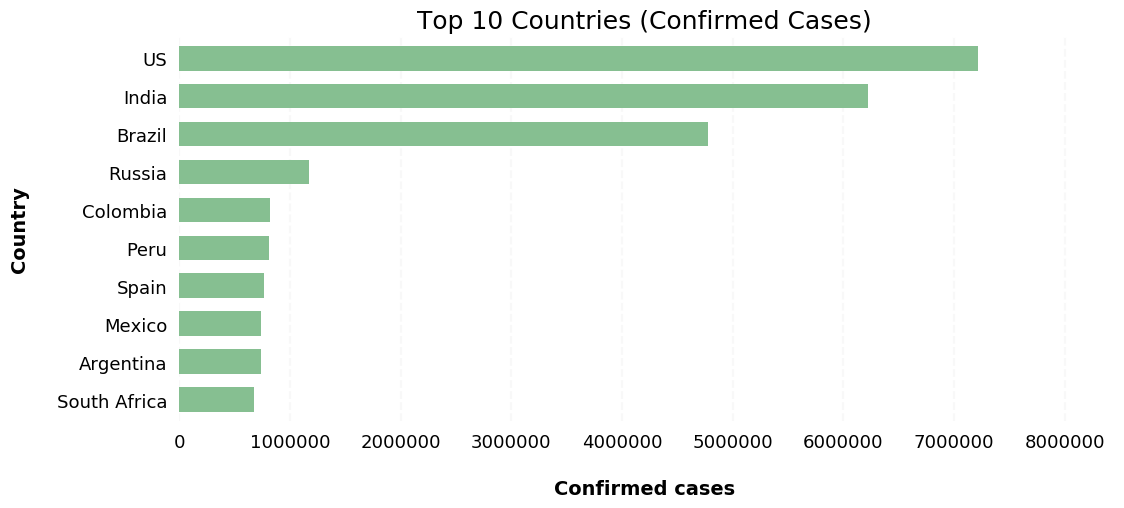

In [503]:
plt.figure(figsize=(12,5))

plt.title("Top 10 Countries (Confirmed Cases)",fontsize=18)
plt.xlabel("Confirmed Cases",fontsize=18)

top10_country = df_countries_cases.sort_values(by=['Confirmed']).tail(10)
ax = top10_country["Confirmed"].plot(kind='barh', figsize=(12,5), color='#86bf91', zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True, size=5,labelsize = 13)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Confirmed cases", labelpad=20, weight='bold', size=12, fontsize=14)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12, fontsize=14)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Text(0, 0.5, 'Country')

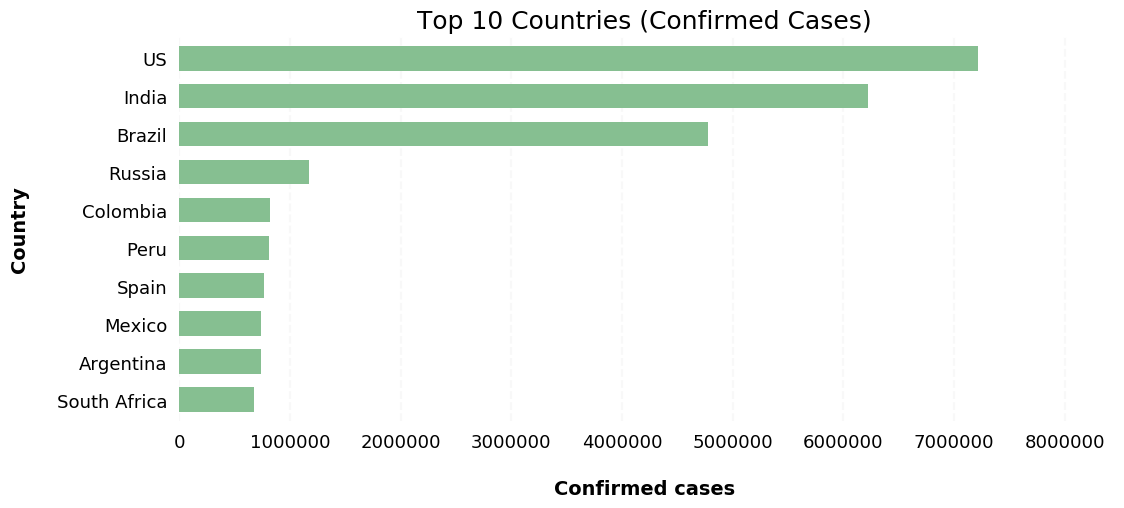

In [505]:
plt.figure(figsize=(12,5))

plt.title("Top 10 Countries (Confirmed Cases)",fontsize=18)
plt.xlabel("Confirmed Cases",fontsize=18)

top10_country = df_countries_cases.sort_values(by=['Confirmed']).tail(10)
ax = top10_country["Confirmed"].plot(kind='barh', figsize=(12,5), color='#86bf91', zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True, size=5,labelsize = 13)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Confirmed cases", labelpad=20, weight='bold', size=12, fontsize=14)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12, fontsize=14)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Text(0, 0.5, 'Country')

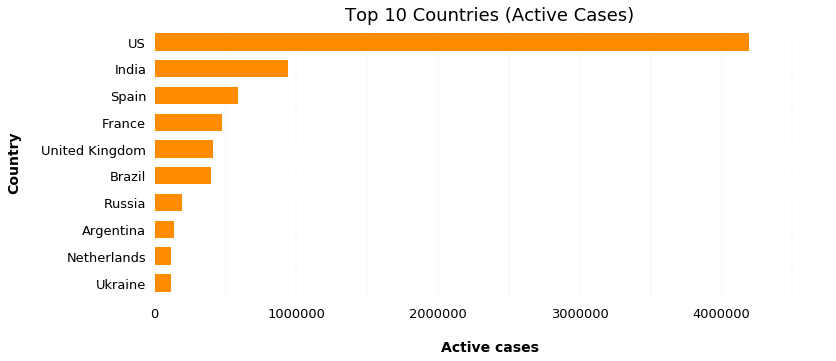

In [338]:
plt.figure(figsize=(12,5))

plt.title("Top 10 Countries (Active Cases)",fontsize=18)
plt.xlabel("Confirmed Cases",fontsize=18)

top10_country = df_countries_cases.sort_values(by=['Active']).tail(10)
ax = top10_country["Active"].plot(kind='barh', figsize=(12,5), color="darkorange", zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True, size=5,labelsize = 13)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Active cases", labelpad=20, weight='bold', size=12, fontsize=14)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12, fontsize=14)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Text(0, 0.5, 'Country')

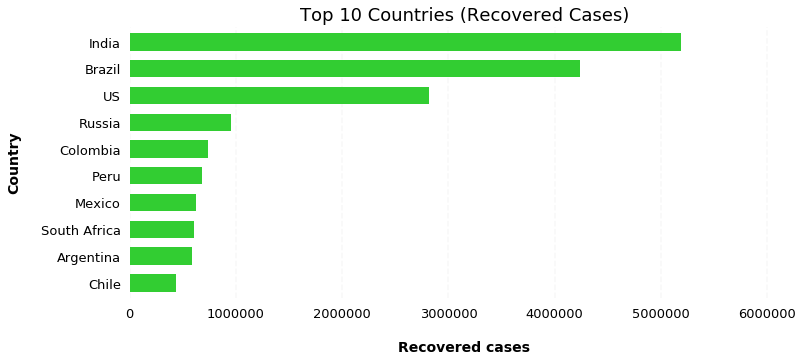

In [339]:
plt.figure(figsize=(12,5))

plt.title("Top 10 Countries (Recovered Cases)",fontsize=18)
plt.xlabel("Recovered Cases",fontsize=18)

top10_country = df_countries_cases.dropna(axis=0).sort_values(by=['Recovered']).tail(10)
ax = top10_country["Recovered"].plot(kind='barh', figsize=(12,5), color="limegreen", zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True, size=5,labelsize = 13)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Recovered cases", labelpad=20, weight='bold', size=12, fontsize=14)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12, fontsize=14)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [341]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


# COVID-19 Spread Analysis
<hr>

Spread Analysis is in two sections 
1. Spread Across Globe
2. Spread Trends in the World, Continents and few most affected Countries

## 1. Spread Across Globe 
<hr> 
### Number of countries affected over the time

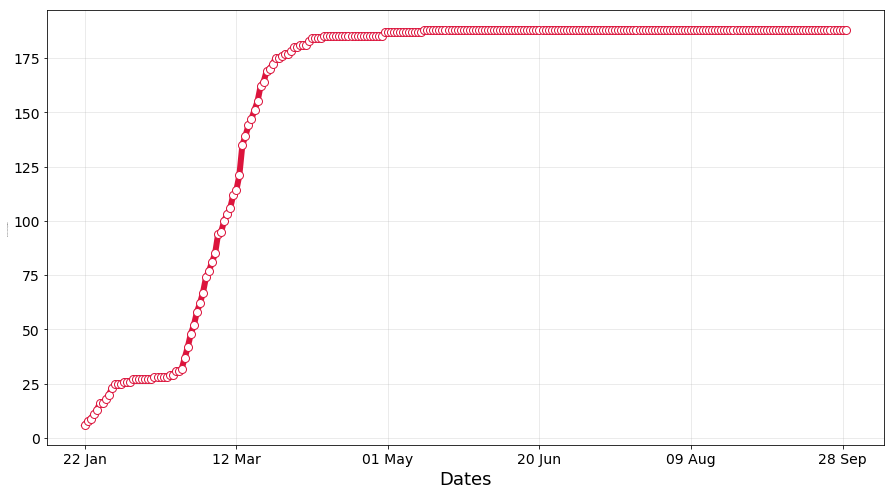

In [380]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

#plt.savefig(out+'spread.png')
plt.show()
plt.close()

### Number of confirmed cases over the time

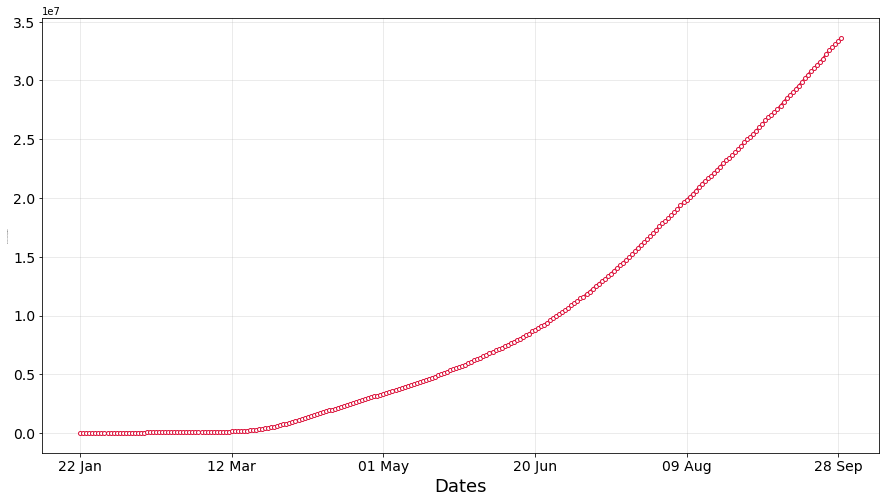

In [406]:
case_nums_confirmed = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).sum(axis=0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_confirmed.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=2, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
plt.plot(d, case_nums_confirmed,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)

#plt.savefig(out+'spread.png')
plt.show()
plt.close()

##  2. Spread Trends in the World, Continents and few most affected Countries
<hr>
1. COVID-19 Global Spread Trends
2. COVID-19 Spread Trends in Different Continents
3. COVID-19 Spread Trends in Few Most Affected Countries
4. COVID-19 Spread Comparison of few most affected countries
5. COVID-19 Spread Comparison of in different continents


### 1. COVID-19 Global Spread Trends
<h>
This graph shows the confirmed, deaths, recovered and active caes trends over the world.


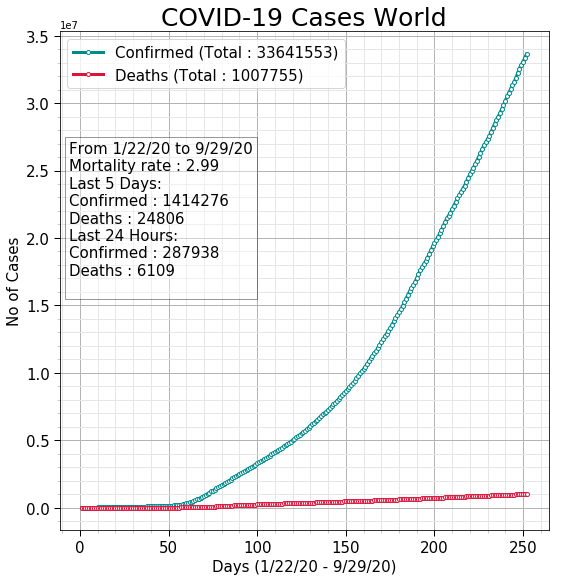

In [355]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))
visualize_covid_cases(df_confirmed, df_deaths,continent = "All",figure = [f,rows,cols, 1])

#plt.savefig(out+'COIVD-19-World.png')
plt.show()

### 2 . COVID-19 Spread Trends in Different Continents

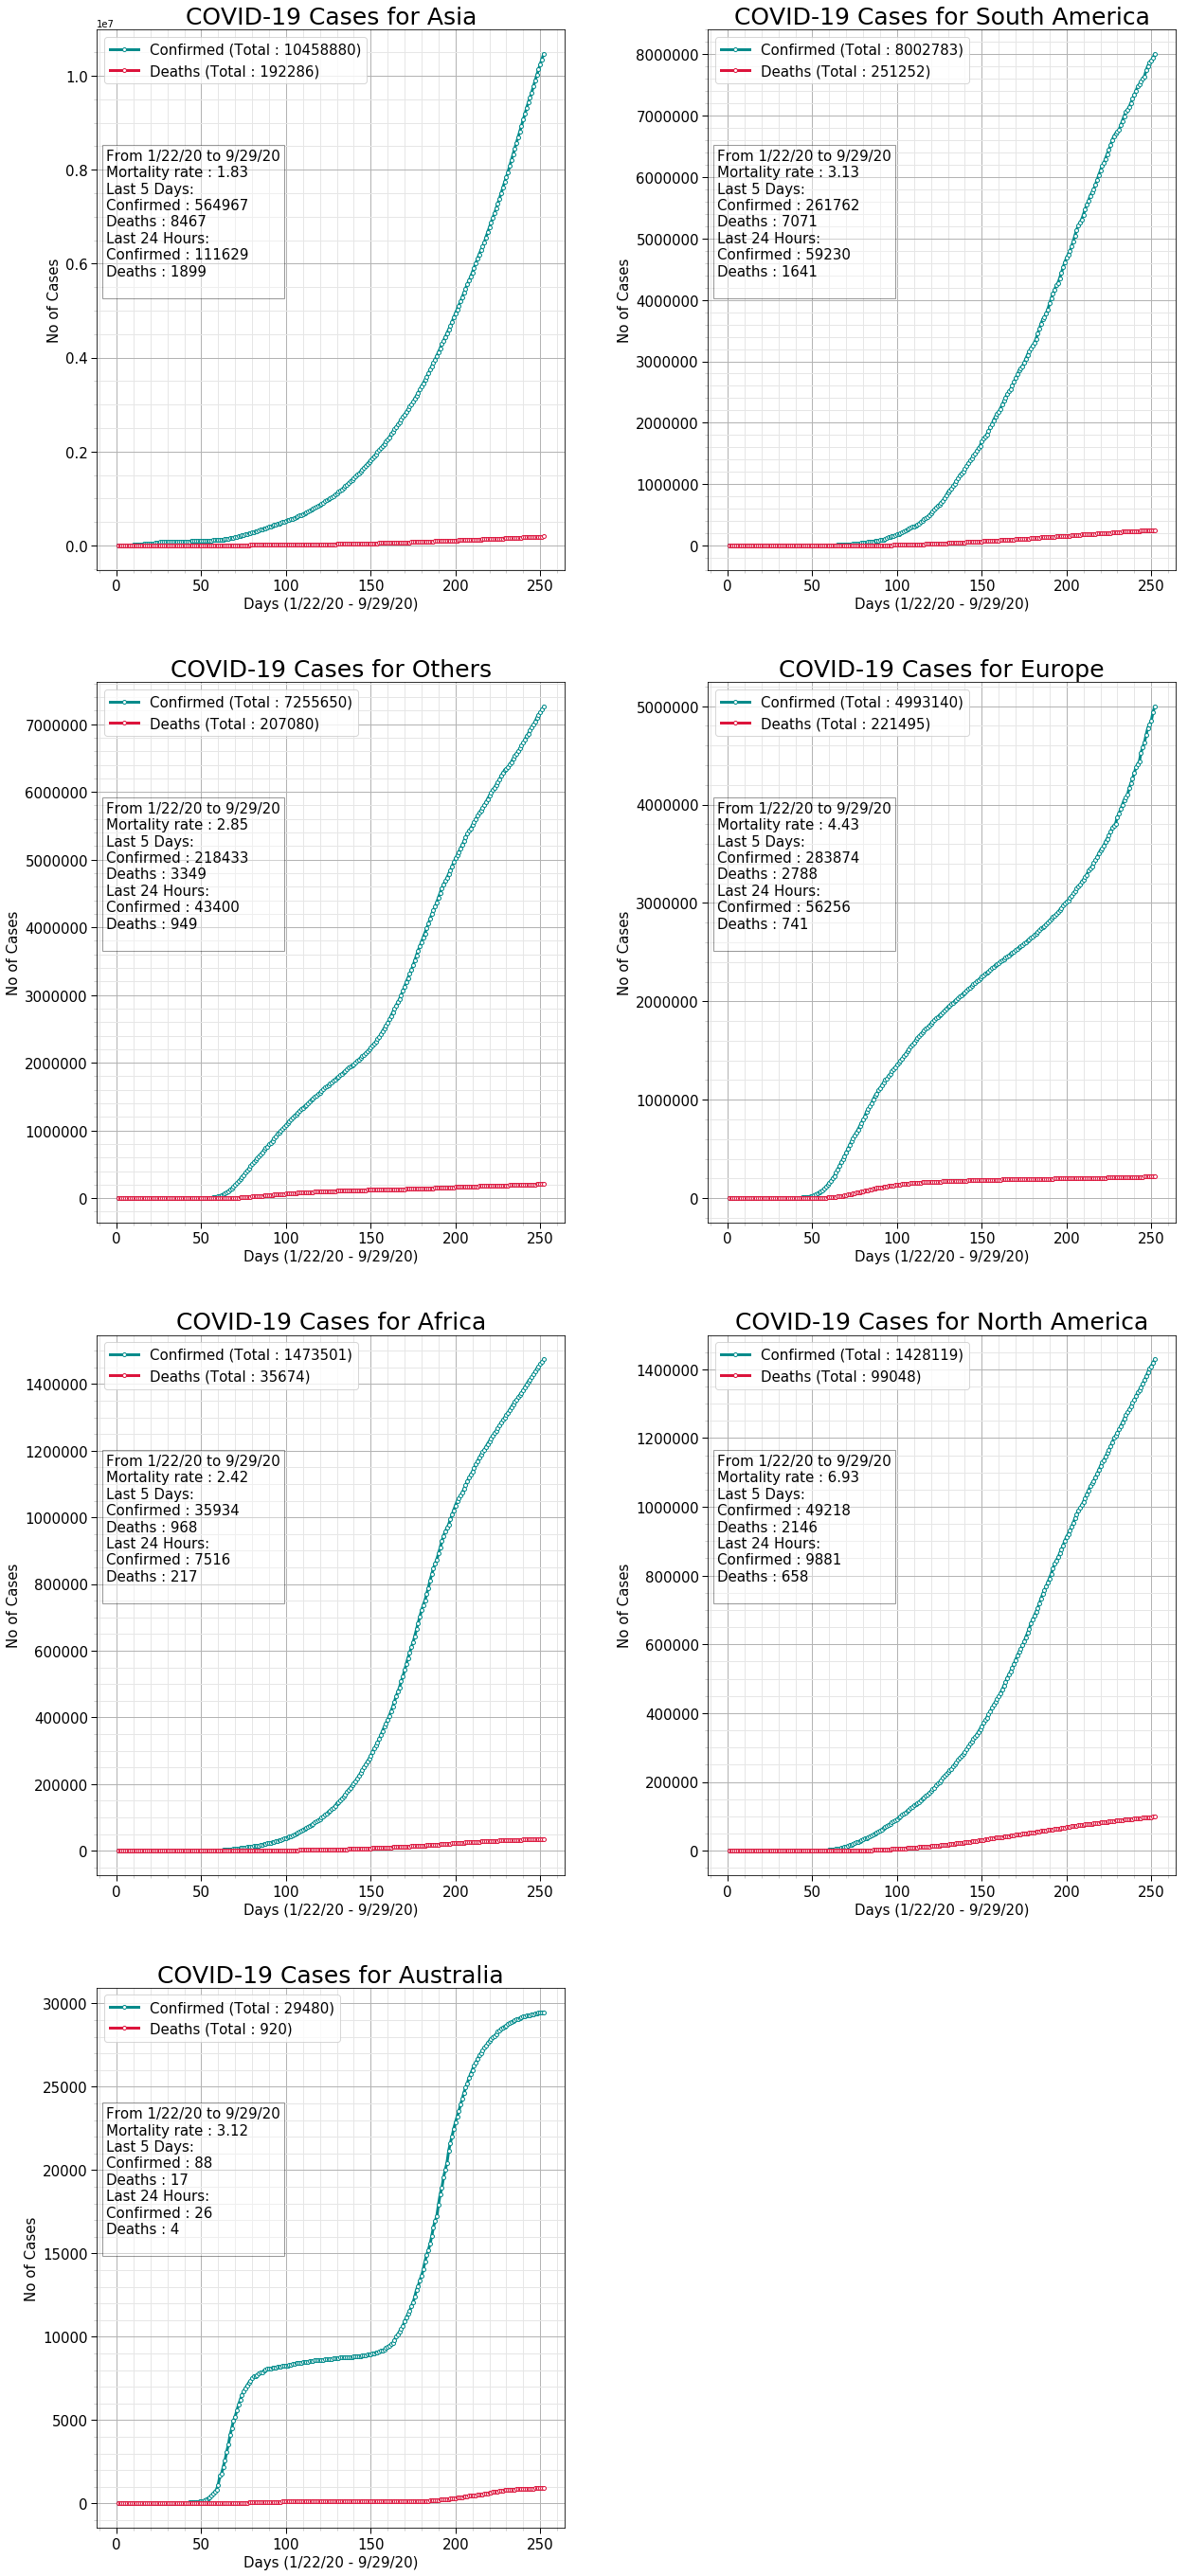

In [349]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,10*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(df_confirmed, df_deaths, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

### 3. COVID-19 Spread Trends in Few Most Affected Countries

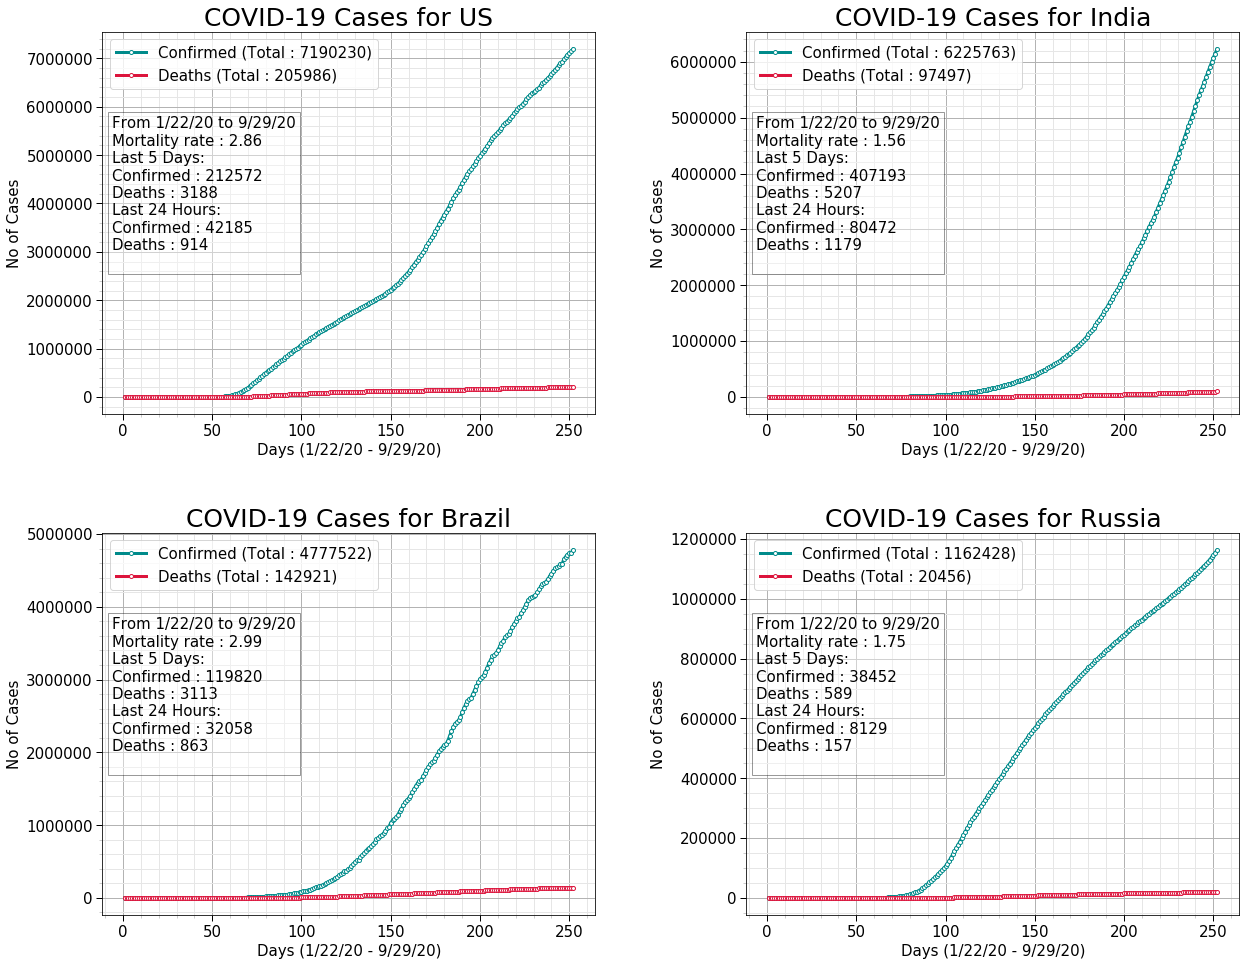

In [364]:
df_countries = df_confirmed.groupby(["country"]).sum().sort_values(df_countries.columns[-1],ascending = False).head(4)

countries = df_countries[df_countries[df_countries.columns[-1]] >= 1000].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])

plt.show()

### 4. COVID-19 Spread Comparison of few most affected countries and INDIA

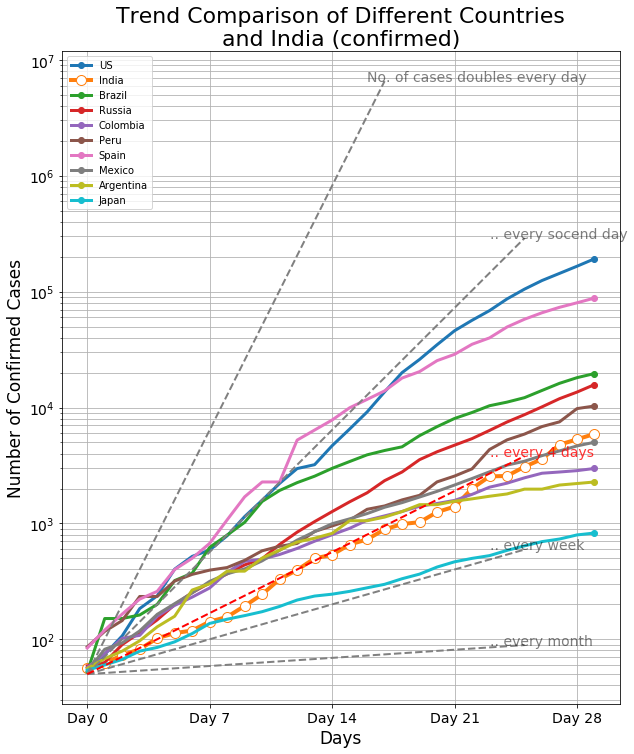

In [365]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "India" and country != "Japan" :
            continue
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Countries\n and India (confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
#plt.savefig(out+'Trend Comparison with India (confirmed).png')
plt.show()

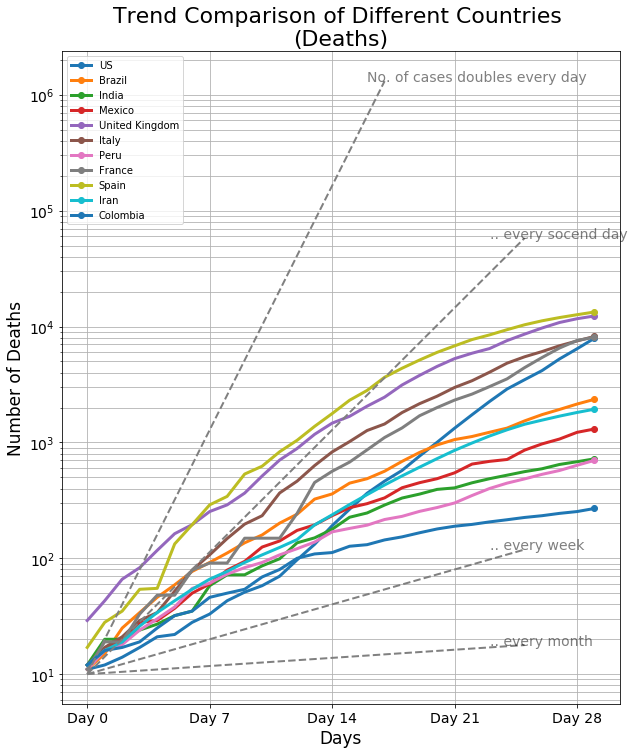

In [368]:
temp = df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Countries \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
#plt.savefig(out+'Trend Comparison countries deaths.png')
plt.show()

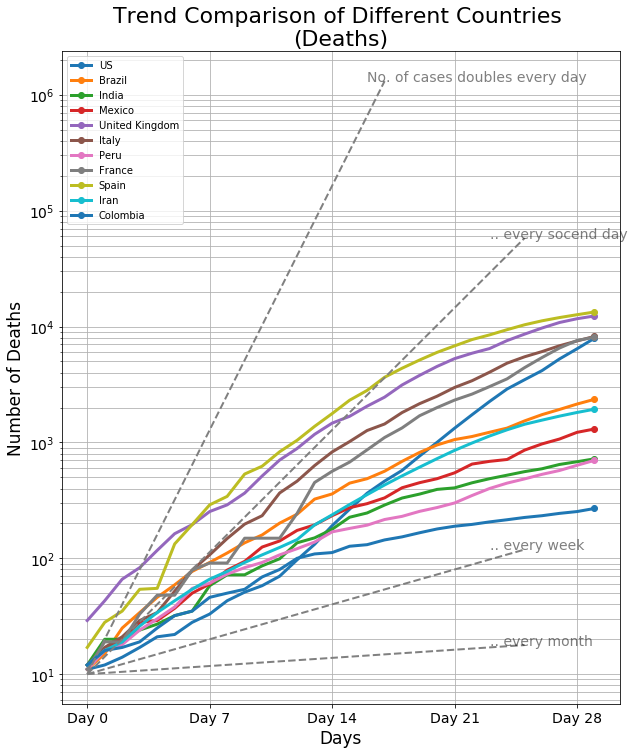

In [371]:
temp = df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Countries \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
#plt.savefig(out+'Trend Comparison countries deaths.png')
plt.show()

### 5. COVID-19 Spread Comparison of in different continents

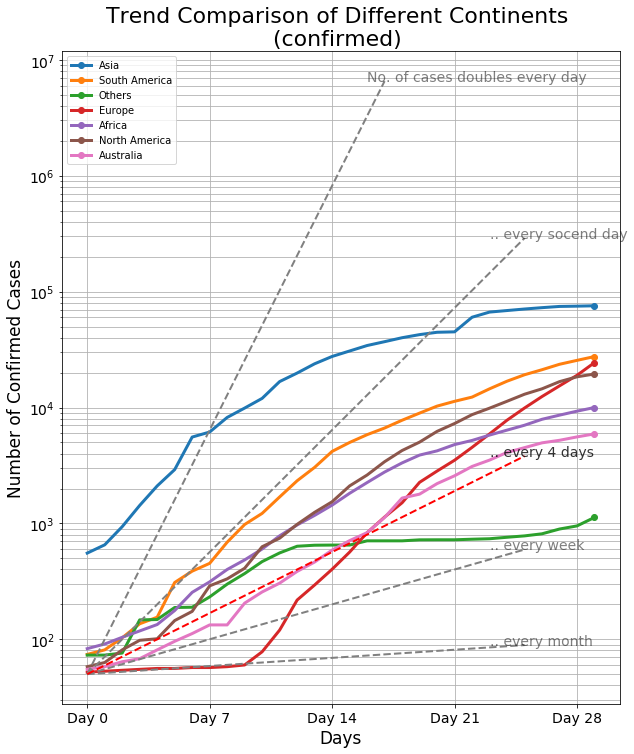

In [375]:
temp = df_confirmed.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
#plt.savefig(out+'Trend Comparison of continents (Confirmed).png')
plt.show()

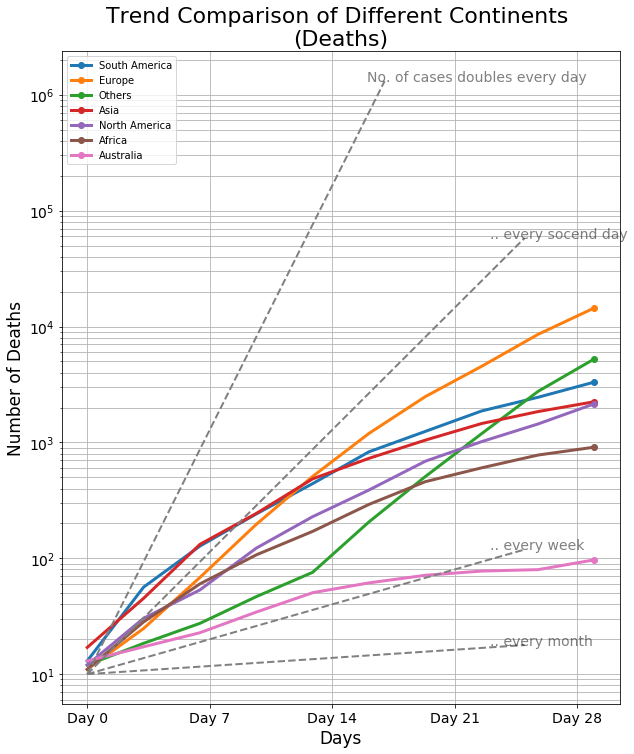

In [377]:
temp = df_deaths.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 10)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
#plt.savefig(out+'Trend Comparison continents (deaths).png')
plt.show()

# COVID-19 Case (Confirmed and Deaths) Percent Split in Different countries (Pie Viz)
<hr>
These pie plots are showing the proportion of the spread of this Pandemic across the world. Each pie is showing a few major contributor countries, and rest countries are shown as "Others". Criteria : 
* Confirmed Cases: Any countries reported more than 5000 confirmed cases are shown the rest of the countries are under "others" Category.
* Deaths: Any Countries reported more than 100 deaths are shown rest of the countries are under "others" Category.
* Active Cases: Any Countries reported more than 4000 active cases are shown the rest of the countries are under "others" Category.
* Recovered Cases: Any Countries reported more than 1000 recoveries are shown rest of the countries are under "others" Category.

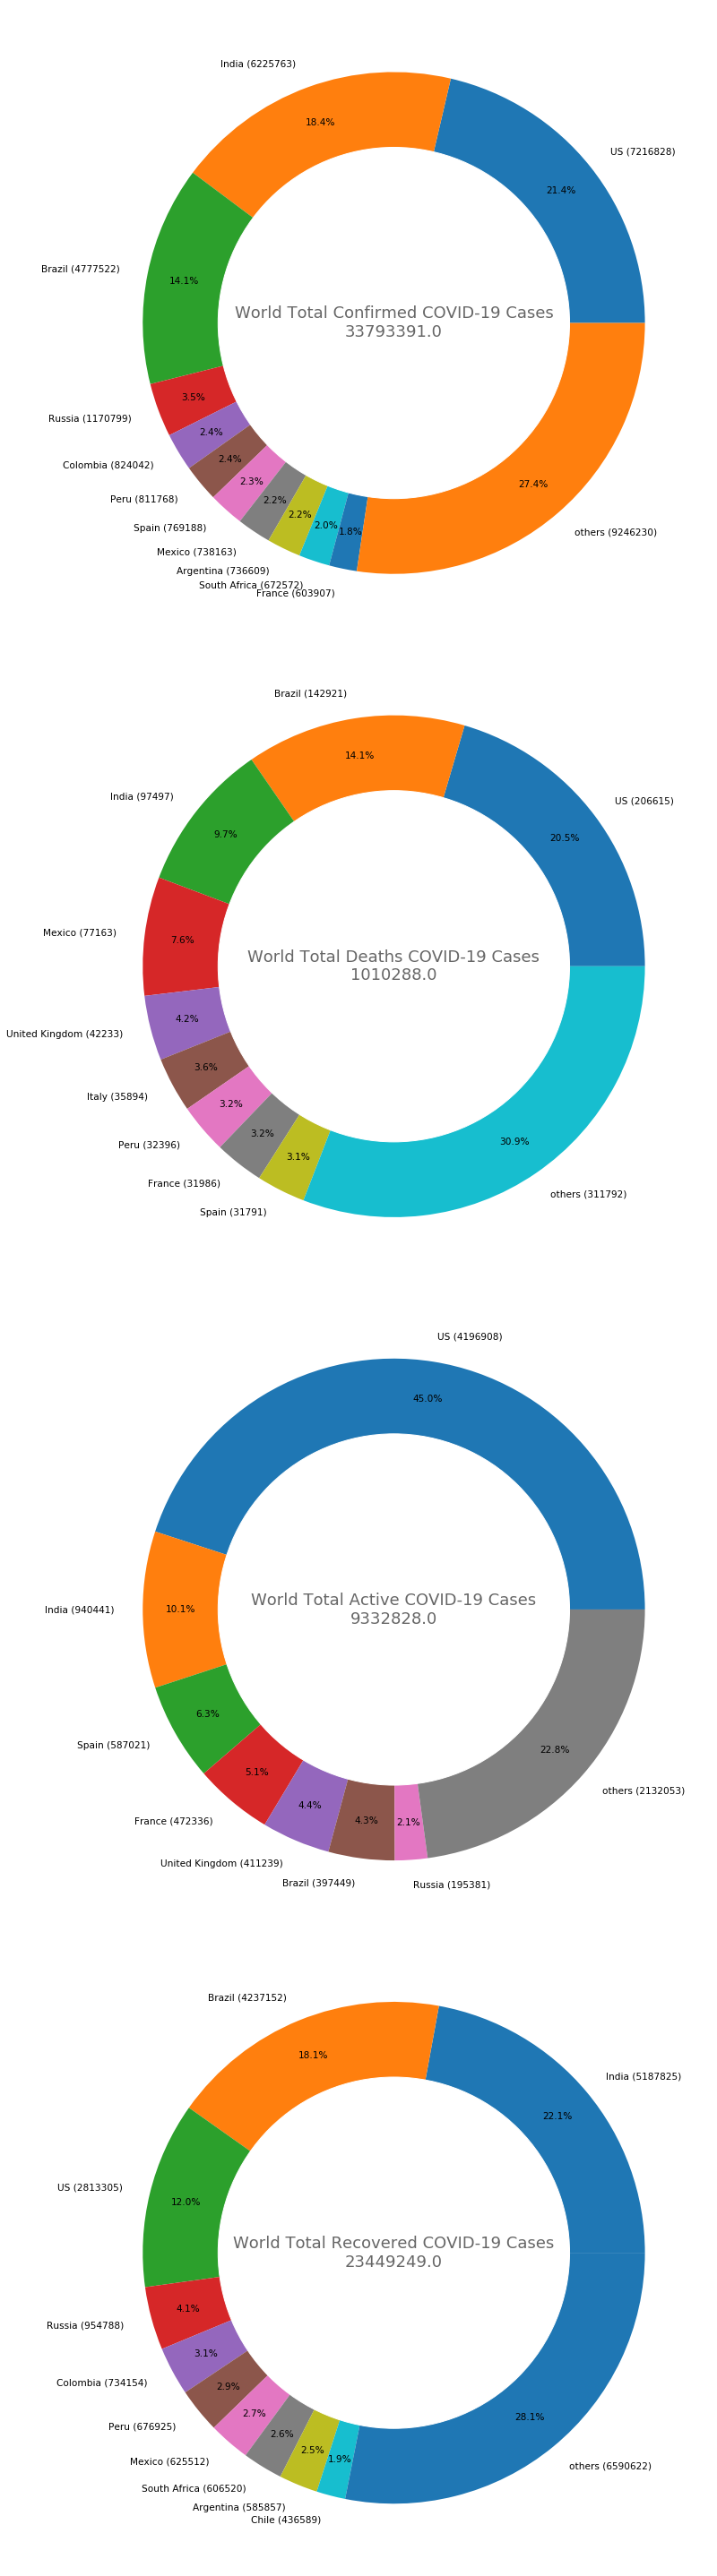

In [412]:
rows = 4
f = plt.figure(figsize=(15,10*rows))

stats = [df_covid19.loc[:,['country','Confirmed']],df_covid19.loc[:,['country','Deaths']],df_covid19.loc[:,['country','Active']],df_covid19.loc[:,['country','Recovered']]]
label = ["Confirmed","Deaths","Active","Recovered"]
threshold = [500000,30000,150000,400000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()


/Users/yingli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning:

invalid value encountered in true_divide



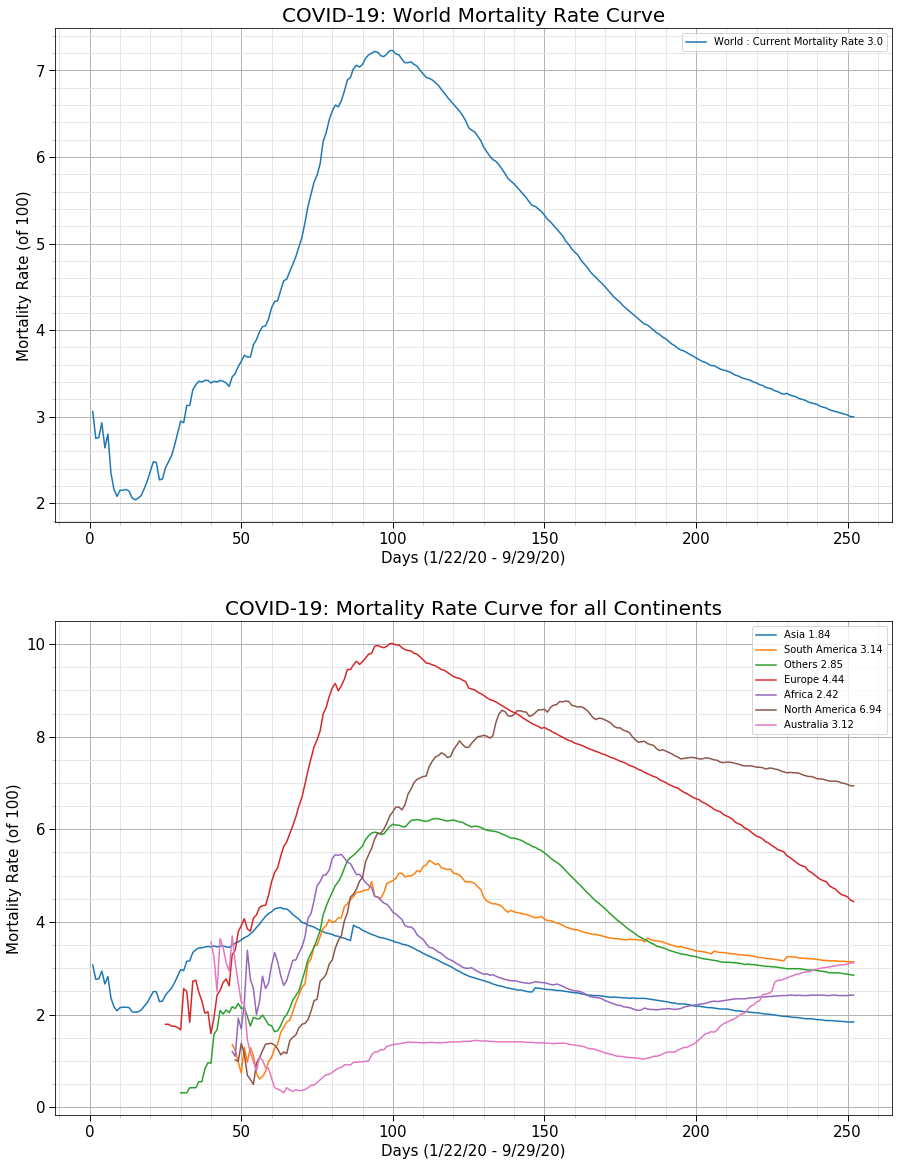

In [414]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
continents = ["All"]+list(continents)

cols =1
rows = 2
axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","Mortality Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]))

plt_title = "COVID-19: World Mortality Rate Curve"
plot_params(ax,axis_label,plt_title)
# Legend Location
l = plt.legend(loc= "best")


#SubPlot 2
ax = f.add_subplot(212)
for i, continent in enumerate(continents[1:]):
    mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continent)
    plt.plot(np.arange(1+mortality_rate[mortality_rate == 0].shape[0],mortality_rate[mortality_rate == 0].shape[0]+mortality_rate[mortality_rate > 0].shape[0]+1),mortality_rate[mortality_rate > 0],label = continents[i+1]+" "+str(mortality_rate[-1]))

plt_title = "COVID-19: Mortality Rate Curve for all Continents"
plot_params(ax,axis_label,plt_title)

# Legend Location
l = plt.legend(loc= "best")

plt.minorticks_on()
#plt.savefig(out+'Mortality rate.png')
plt.show()


### COVID-19: Change in Mortality Rate of Each Countries Over Time

In [415]:

df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths','continent'].max().reset_index()
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter(df_data, y=100*df_data["Deaths"]/(df_data["Confirmed"]+1),
                    x= df_data["Confirmed"]+1,
                    range_y = [-1,18],
                    range_x = [1,df_data["Confirmed"].max()+10000],
                    color= "continent", hover_name="Country_Region",
                    hover_data=["Confirmed","Deaths"],
                    range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                    animation_frame="Last_Update", 
                    animation_group="Country_Region",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='COVID-19: Change in Mortality Rate of Each Countries Over Time',
                    size = np.power(df_data["Confirmed"]+1,0.3)-0.5,
                    size_max = 30,
                    log_x=True,
                    height =700,
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.update_xaxes(title_text="Confirmed Cases (Log Scale)")
fig.update_yaxes(title_text="Mortality Rate (%)")
fig.show()

# Comparision of Mortality and Recovery Rate 
<hr>
**Note :**
* **Depricated: [Check out version 17](https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons?scriptVersionId=30677812)**

In any Epidemic or Pandemic, the study of Mortality Rate and Recovery Rate has an important role. This plot compares the variation of MR and RR over time through the World. 

**Scale : LOG**

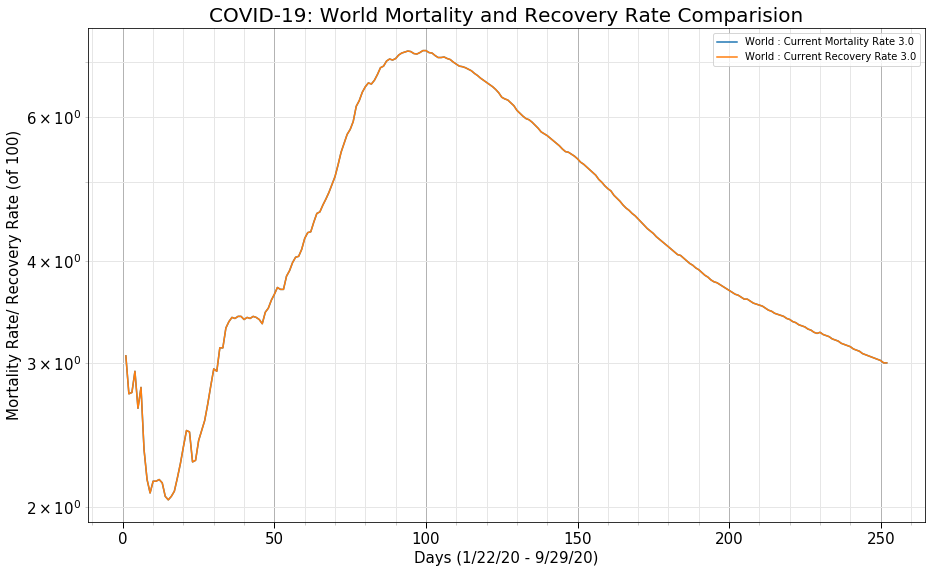

In [417]:
cols =1
rows = 2
axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","Mortality Rate/ Recovery Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
recovered_rate = get_mortality_rate(df_confirmed,df_recovered,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]))
plt.plot(np.arange(1,recovered_rate.shape[0]+1),recovered_rate,label = "World : Current Recovery Rate "+str(recovered_rate[-1]))

plt_title = "COVID-19: World Mortality and Recovery Rate Comparision"
plot_params(ax,axis_label,plt_title,scale = "log")
# Legend Location
l = plt.legend(loc= "best")

# Cumulative Confirmed Cases and Cumulative Recovery Vs Cumulative Deaths Analysis 
<hr>
The variation of Cumulative Confirmed Cases and Cumulative Recovery with Cumulative Deaths can show a trend. These 2 curves depict the same. Also, these curves should be a straight line as shown in the 1st curve, but the 2nd curve is not showing that trend, and as the number of recovered cases is increasing, death is increasing at a faster rate.
* 1st curve: Cumulative Confirmed Cases VS Cumulative Deaths 
* 2nd curve: Cululative Recovery VS Cumulative Deaths

**NOTE :**
* ** Cumulative Recovery Vs Cumulative Deaths has been depricated. [Check out version 17](https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons?scriptVersionId=30677812)**

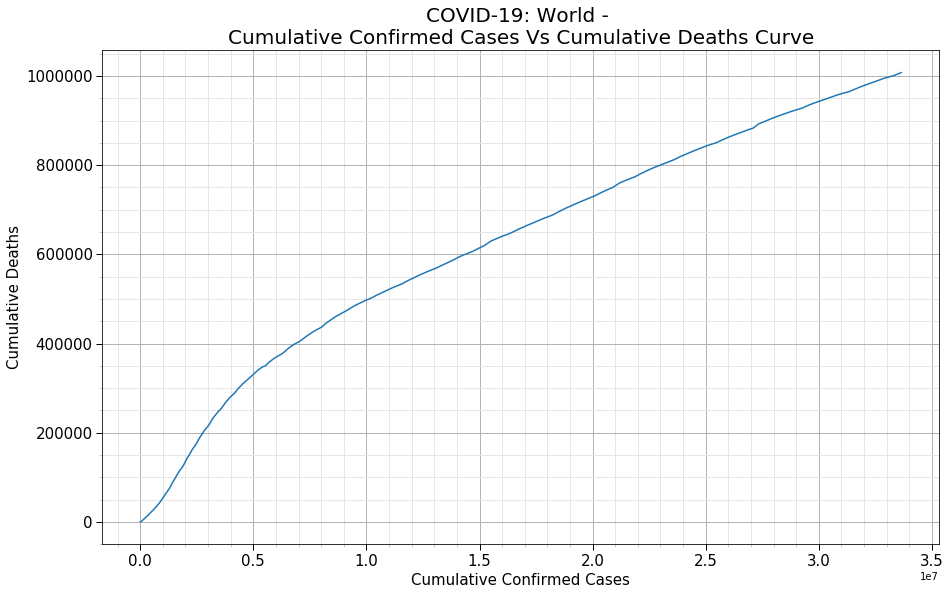

In [426]:
cols =1
rows = 2

f = plt.figure(figsize=(15,10*rows))

# SubPlot 1
ax = f.add_subplot(211)
plt.plot(np.sum(np.asarray(df_confirmed.iloc[:,5:]),axis = 0),np.sum(np.asarray(df_deaths.iloc[:,5:]),axis = 0))

axis_label = ["Cumulative Confirmed Cases","Cumulative Deaths"]
plt_title = "COVID-19: World - \nCumulative Confirmed Cases Vs Cumulative Deaths Curve"
plot_params(ax,axis_label,plt_title)


# # SubPlot 2
# ax = f.add_subplot(212)
# mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
# plt.plot(np.sum(np.asarray(df_recovered.iloc[:,5:]),axis = 0),np.sum(np.asarray(df_deaths.iloc[:,5:]),axis = 0))

# axis_label = ["Cumulative Recoveries","Cumulative Deaths"]
# plt_title = "COVID-19: World - Cumulative Recovery Vs Cumulative Deaths Curve"

# plot_params(ax,axis_label,plt_title)
plt.minorticks_on()
#plt.savefig(out+'Cumulative Confirmed Cases Vs Cumulative Deaths Curve.png')
plt.show()

### Variation of Deaths vs Confirmed cases of different cuntries over time

In [420]:
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths','continent'].max().reset_index()
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter(df_data, y=df_data["Deaths"],
                    x= df_data["Confirmed"]+1,
                    range_y = [1,df_data["Deaths"].max()+1000],
                    range_x = [1,df_data["Confirmed"].max()+10000],
                    color= "continent", hover_name="Country_Region",
                    hover_data=["Confirmed","Deaths"],
                    range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                    animation_frame="Last_Update", 
                    animation_group="Country_Region",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='COVID-19: Change Deaths vs Cofirmed of Each Countries Over Time',
                    size = np.power(df_data["Confirmed"]+1,0.3)-0.5,
                    size_max = 30,
                    log_x=True,
                    log_y=True,
                    height =700,
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.update_xaxes(title_text="Confirmed Cases (Log Scale)")
fig.update_yaxes(title_text="Deaths Rate (Log Scale)")
fig.show()

# COVID-19: USA

In [427]:
df_confirmed_US.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 9/20/20  9/21/20  9/22/20  9/23/20  9/24/20  \
0  32.539527 -86.644082  ...    1690     1691     1714     1715     1738   
1  30.727750 -87.722071  ...    5061     5087     5124     5141     5165   
2  31.868263 -85.387129  ...     835      838      848      851      857   
3  32.996421 -87.125115  ...     632      636      635      638      642   
4  33.982109 -86.567906  ...    1551     1560     1573     1580     1594   

   9/25/20  9/26/20  9/27/20  9/28/20  9/29/20  
0     1757     1764     1773     1785     1787  
1     5456     5477     5526     5588     5606  
2      873      882      885      886      886  
3      652      654      656      657      658  
4     1608     1611     1617     1618     1621  

[5 rows x 263 columns]

In [436]:
df_usa_confirmed = df_confirmed_US.groupby('Province_State').sum().drop(['Lat','Long_','UID','code3','FIPS'],axis =1).sum(axis=1)

In [445]:
df_usa_deaths = df_deaths_US.groupby('Province_State').sum().drop(['Lat','Long_','UID','code3','FIPS','Population'],axis =1).sum(axis=1)

In [478]:
df_usa = pd.DataFrame(data=df_usa_confirmed, columns=['Confirmed'])
df_usa['Deaths'] = df_usa_deaths

In [479]:
df_usa.sort_values("Confirmed", ascending=False)

Confirmed   Deaths
Province_State                              
New York                   67577546  5290718
California                 60957581  1287967
Texas                      51618828  1004577
Florida                    51355166   977433
New Jersey                 28768548  2368323
Illinois                   26806905  1072349
Georgia                    23451163   571822
Arizona                    18002733   435737
Massachusetts              17501126  1243683
Pennsylvania               16922645  1025499
North Carolina             15010360   274672
Louisiana                  14640295   601664
Michigan                   13832792  1002041
Tennessee                  13158804   156743
Virginia                   12342356   304058
Maryland                   12221891   488664
Ohio                       12010735   485683
Alabama                    10648893   208386
South Carolina             10150533   228232
Indiana                     9644463   424622
Connecticut                 7616553   660267
Washington                  7522981   244334
Minnesota                   7377793   225372
Missouri                    7237124   185129
Mississippi                 7222591   231779
Wisconsin                   7213120   134051
Colorado                    6506069   266495
Iowa                        6280252   122938
Nevada                      5723503   124578
Arkansas                    5298486    71148
Utah                        4953422    38601
Oklahoma                    4831554    84692
Kentucky                    4280535   106381
Kansas                      3829034    53764
Nebraska                    3628641    44392
Rhode Island                2842519   138005
Puerto Rico                 2580875    41365
Idaho                       2542085    30472
New Mexico                  2538925    86068
Oregon                      2346271    46257
Delaware                    2076220    76240
District of Columbia        1759929    83537
South Dakota                1407284    17491
North Dakota                1063858    15724
New Hampshire                938452    53634
West Virginia                926947    21403
Montana                      574115     9138
Hawaii                       570844     6326
Maine                        545531    17505
Alaska                       414400     3674
Wyoming                      367560     3945
Vermont                      222494     9603
Guam                         102646     1579
Virgin Islands                72809     1444
Grand Princess                19458      536
Diamond Princess               9647        0
Northern Mariana Islands       6313      358
American Samoa                    0        0

Text(0, 0.5, 'Country')

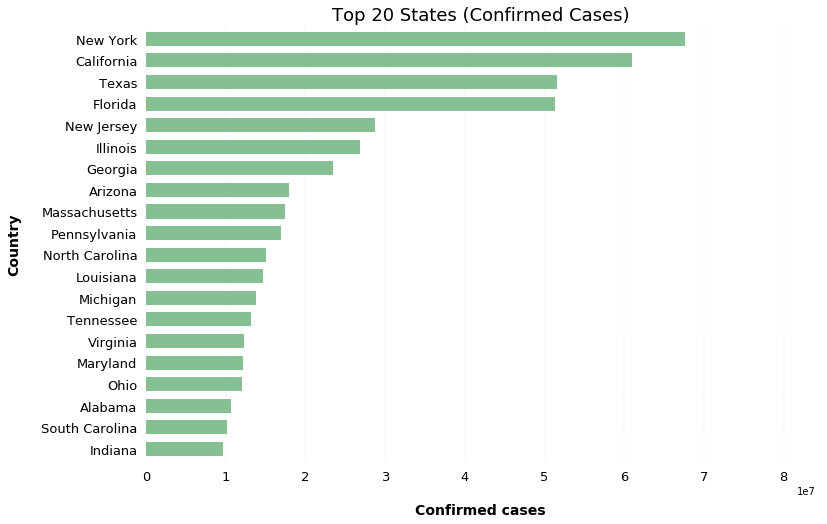

In [480]:
plt.title("Top 20 States (Confirmed Cases)",fontsize=18)
plt.xlabel("Confirmed Cases",fontsize=18)

top10_state = df_usa.Confirmed.sort_values().tail(20)
ax = top10_state.plot(kind='barh', figsize=(12,8), color='#86bf91', zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True, size=5,labelsize = 13)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Confirmed cases", labelpad=20, weight='bold', size=12, fontsize=14)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12, fontsize=14)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Text(0, 0.5, 'Country')

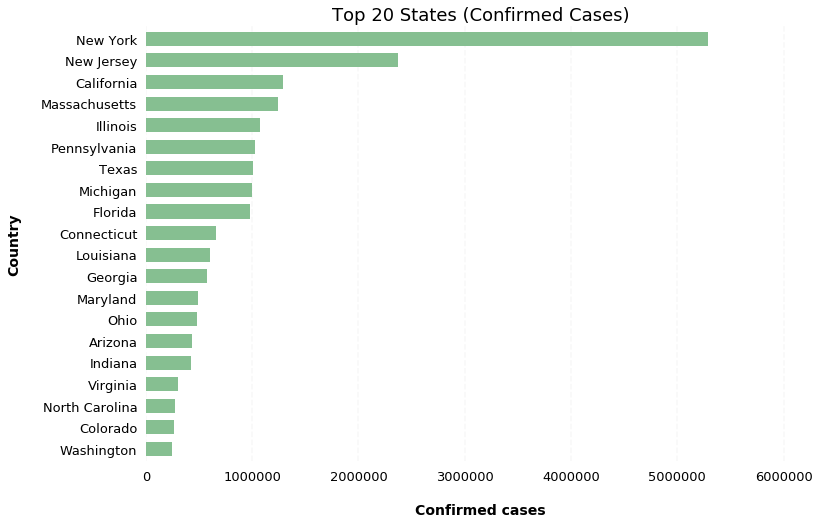

In [481]:
plt.title("Top 20 States (Confirmed Cases)",fontsize=18)
plt.xlabel("Confirmed Cases",fontsize=18)

top10_state = df_usa.Deaths.sort_values().tail(20)
ax = top10_state.plot(kind='barh', figsize=(12,8), color='#86bf91', zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True, size=5,labelsize = 13)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Confirmed cases", labelpad=20, weight='bold', size=12, fontsize=14)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12, fontsize=14)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [494]:
df_usa_VA = df_confirmed_US[df_confirmed_US['Province_State']=='Virginia'].groupby('Admin2').sum().drop(['Lat','Long_','UID','code3','FIPS'],axis =1).sum(axis=1)

Text(0, 0.5, 'Country')

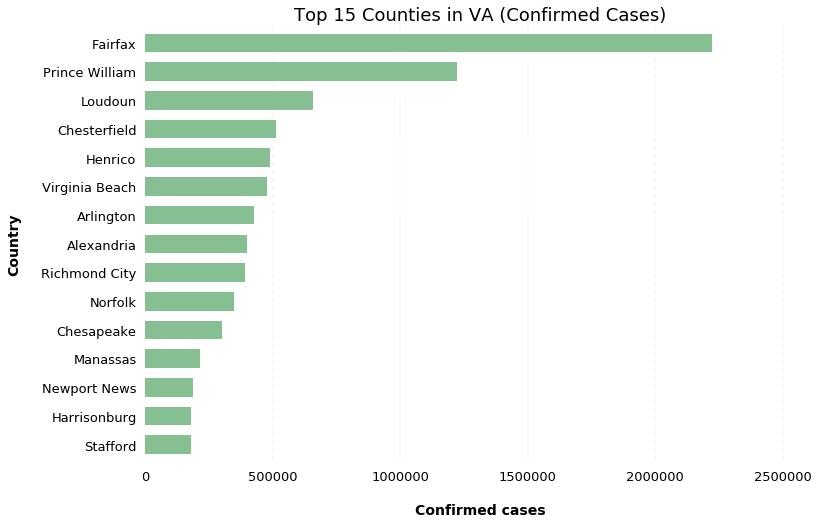

In [497]:
plt.title("Top 15 Counties in VA (Confirmed Cases)",fontsize=18)
plt.xlabel("Confirmed Cases",fontsize=18)

top10_state = df_usa_VA.sort_values().tail(15)
ax = top10_state.plot(kind='barh', figsize=(12,8), color='#86bf91', zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True, size=5,labelsize = 13)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Confirmed cases", labelpad=20, weight='bold', size=12, fontsize=14)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12, fontsize=14)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

## Mask-Wearing Survey Data

The New York Times is releasing estimates of mask usage by county in the United States.

This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)

Specifically, each participant was asked: How often do you wear a mask in public when you expect to be within six feet of another person?

This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again.

#### Methodology
To transform raw survey responses into county-level estimates, the survey data was weighted by age and gender, and survey respondents’ locations were approximated from their ZIP codes. Then estimates of mask-wearing were made for each census tract by taking a weighted average of the 200 nearest responses, with closer responses getting more weight in the average. These tract-level estimates were then rolled up to the county level according to each tract’s total population.

By rolling the estimates up to counties, it reduces a lot of the random noise that is seen at the tract level. In addition, the shapes in the map are constructed from census tracts that have been merged together — this helps in displaying a detailed map, but is less useful than county-level in analyzing the data.

In [498]:
mask_use = pd.read_csv('../covid-19-data/mask-use/mask-use-by-county.csv')
#mask_use_least = mask_use.sort_values(by=['ALWAYS']).head(1)
#mask_use_most = mask_use.sort_values(by=['ALWAYS']).tail(1)
mask_use_ave = mask_use.mean().to_numpy()

In [499]:
mean = mask_use.drop(['COUNTYFP'],axis=1).mean().to_numpy()

### Pie plot

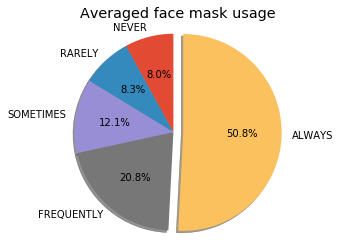

In [500]:
plt.style.use('ggplot')
plt.title('Averaged face mask usage')
#fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0.1) 
labels = ['NEVER', 'RARELY','SOMETIMES','FREQUENTLY','ALWAYS']
plt.pie(mean, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Whiskers plot

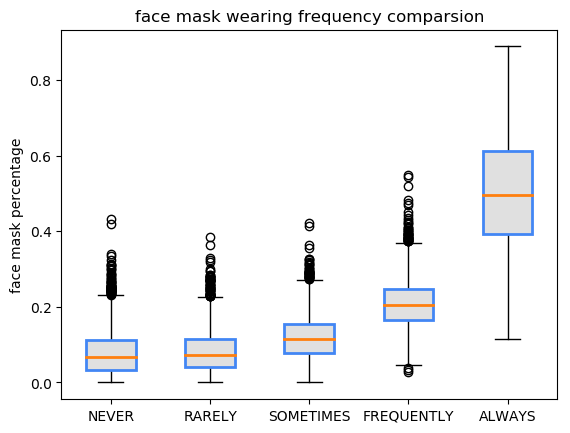

In [502]:
x = mask_use.drop(['COUNTYFP'],axis=1).to_numpy()

plt.style.use('default')
labels = ['NEVER', 'RARELY','SOMETIMES','FREQUENTLY','ALWAYS']

plt.title('face mask wearing frequency comparsion')
plt.ylabel('face mask percentage')

boxes = plt.boxplot(x, labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # Set edge color
    box.set(color='#4286f4', linewidth=2)
    
    # Change Fill Color
    box.set(facecolor='#e0e0e0')
    
plt.show()